# Exercises in Classification II

## Exercise 1

In this exercise, we look at the titanic dataset, which is on Moodle in the file "titanic_survival_data.csv". 

Answer the following questions:
1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.
2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.
3. Do MinMax scaling on the training dataset.
5. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.
6. For the chosen K, train a model on the entire training dataset.
7. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.
8. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score
9. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

1. Clean the `income` variable such that it has only two values

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier


In [47]:
df = pd.read_csv('adult.csv')
print(df.head())
df.describe()

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
df_cleaned = df.copy()
print(df_cleaned["income"].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [49]:
df_cleaned["income"] = df_cleaned["income"].str.strip().str.replace(r"\.$", "", regex=True)
print(df_cleaned["income"].unique())

['<=50K' '>50K']


2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

i want to use the features age, education-num and hours-per-week to predict income. i think these are the features that will have the biggest impact in predicting income 

In [50]:
# Check feature data types and missing values
print(df_cleaned[["age", "education-num", "hours-per-week"]].info())

# Check for missing values
print(df_cleaned[["age", "education-num", "hours-per-week"]].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   education-num   48842 non-null  int64
 2   hours-per-week  48842 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB
None
age               0
education-num     0
hours-per-week    0
dtype: int64


3. Create X and y dataset and split the datasets into training and testing sets

In [51]:
# Define feature variables (from Step 2)
X = df_cleaned[["age", "education-num", "hours-per-week"]]  # Add more if needed
y = df_cleaned["income"]  # Target variable (already cleaned)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (39073, 3)
Test set size: (9769, 3)


4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 

In [56]:
# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Try different values of K
for k in [3, 5, 7, 9, 11, 13, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_knn)
    print("KNN ( k =",k ,") Accuracy: ", acc)

KNN ( k = 3 ) Accuracy:  0.7608762411710512
KNN ( k = 5 ) Accuracy:  0.7742860067560651
KNN ( k = 7 ) Accuracy:  0.777356945439656
KNN ( k = 9 ) Accuracy:  0.780427884123247
KNN ( k = 11 ) Accuracy:  0.7840106459207697
KNN ( k = 13 ) Accuracy:  0.789128877060088
KNN ( k = 15 ) Accuracy:  0.7919950864981062


In [70]:

# Train final KNN model with k=13
best_knn = KNeighborsClassifier(n_neighbors=13)
best_knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Confusion Matrix:
 [[6848  583]
 [1477  861]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.92      0.87      7431
        >50K       0.60      0.37      0.46      2338

    accuracy                           0.79      9769
   macro avg       0.71      0.64      0.66      9769
weighted avg       0.77      0.79      0.77      9769



looking at these results, it is clear that KNN performs well at predicting low income(<=50k) looking at high metrics on the classification report. on the other hand it has a hard time predicting high incom (>50k). 

5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.

In [71]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test_scaled)

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.93      0.87      7431
        >50K       0.60      0.32      0.42      2338

    accuracy                           0.79      9769
   macro avg       0.71      0.63      0.64      9769
weighted avg       0.76      0.79      0.76      9769



comparing the two models, it seems like they perform very similarly. there are minor differences, and overall it seems that KNN outperforms logistic regression especially in the high income (>50K) where they both seem to struggle. Though this does not mean that KNN is a better model, as logistic regression also has its uses. it is a more effecient model, and scales a lot better with larger datasets 

6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


In [91]:
# Initialize and train the Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Confusion Matrix:
 [[6789  642]
 [1503  835]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.91      0.86      7431
        >50K       0.57      0.36      0.44      2338

    accuracy                           0.78      9769
   macro avg       0.69      0.64      0.65      9769
weighted avg       0.76      0.78      0.76      9769



looking at the metrics here, it seems that the decision tree is the worst performing model out of the three, so far, with lower precision, recall and and overall accuracy. this again is a fast model like the logistic regression. to improve the model it could be fine tuned by for example adjusting depth. 

7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

since i want to find the optimal but not spend too much time waiting for the result, i have decided to run some accuracy tests on a limited number of trees and depth

In [100]:
nTrees = [200, 300, 400, 600, 800]
maxDepth = [1, 2, 3, 4, 6]

CVlist = []
for nt in nTrees:
    print(f"Trying {nt} trees")
    for md in maxDepth:
        print(f"Trying max depth of {md}")
        
        # Initialize model
        rf_model = RandomForestClassifier(n_estimators=nt, max_depth=md, random_state=42)

        # Perform 10-fold cross-validation
        scores = cross_val_score(rf_model, X_train, y_train, cv=10)

        # Store results
        CVlist.append({"Number of Trees": nt, "Max Depth": md, "CV Accuracy": scores.mean()})  

# Convert results to DataFrame
CV_df = pd.DataFrame(CVlist)



Trying 800 trees
Trying max depth of 6
Trying max depth of 7
Trying max depth of 8


KeyboardInterrupt: 

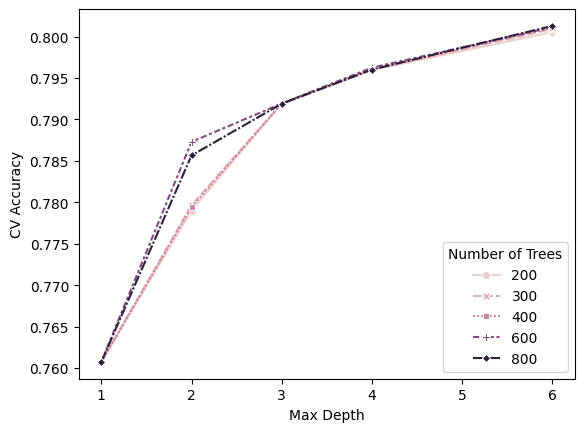

In [98]:
sns.lineplot(data=CV_df, x="Max Depth", y="CV Accuracy", hue="Number of Trees", style="Number of Trees", markers=True)
plt.show()

In [107]:
rf_final = RandomForestClassifier(n_estimators=800, max_depth=6)
rf_final.fit(X_train, y_train)

y_pred_rf = rf_final.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[7000  431]
 [1517  821]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.94      0.88      7431
        >50K       0.66      0.35      0.46      2338

    accuracy                           0.80      9769
   macro avg       0.74      0.65      0.67      9769
weighted avg       0.78      0.80      0.78      9769



looking at the random forest, it seems like it is the best model overall with the highest accuracy, precision, and fewest false positives, though KNN is still better at identifying high income individuals.


8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [113]:
ab_model = AdaBoostClassifier() 
ab_model.fit(X_train, y_train)
y_pred_ada = ab_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

Confusion Matrix:
 [[6989  442]
 [1521  817]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.94      0.88      7431
        >50K       0.65      0.35      0.45      2338

    accuracy                           0.80      9769
   macro avg       0.74      0.64      0.67      9769
weighted avg       0.78      0.80      0.78      9769



random forest remains the best model overall. Though both random forest and AdaBoost have an accuracy of 80%, but random forest had fewer false positives, as well as better precision for higher income individuals 
KNN is still best at predicting high income individuals, but it struggles with precision. and finally logistic regression is good for generalization but because the two classes are imbalanced that makes it worse. 
you could tune adaboost further for it to reach random forest, but as it stands now random forest is best 